# Problem Set 3

Written by Jess Breda & Max Argon, and modified from work by Yotam Sagiv.

# Part 1- Hodkin Huxley Simulation & Action Potential Concepts
In this part of the assignment, we're going to run some simulations of a "neuron" behaving  according to the Hodgkin-Huxley equations. Having completed this part, you should be able to answer the following questions:

1. What is Euler's method and how do I code it?
2. How do the various terms in the Hodgkin-Huxley model contribute to the system's behaviour?

A note on grading: You will be graded on correctness and also clarity. That means code should be readable and commented. For all plots, make sure to label your axes. **If these code practices aren't followed, half the points for the question will be removed.**


## Differential equations background

At the most basic level, a differential equation relates the value of a function to its derivatives. In sciences that deal with complex dynamical systems (e.g. neuroscience), they are a convenient tool to describe the behaviour of a system in terms of how its constituent parts change over time -- it is often easier to specify a series of time-derivatives than to write down an equation that immediately gives the state of the system at any given time. 

For concreteness, let's say you have some function $f(t)$. A differential equation looks something like $\frac{df(t)}{dt} = g(f(t))$, where the derivative of a function is related to the function itself through another function $g$. One fundamental example is $\frac{df(t)}{dt} = f(t)$ (the derivative of $f$ is equal to $f$). When we have a differential equation such as this, we often would like to find its **solution**; the solution to a differential equation is the value of $f(t)$ for a set of times that we might be interested in. 

This can be provided in two ways. For some differential equations there exists an analytical solution -- i.e. it is possible to derive a closed-form expression for $f(t)$ that doesn't depend on any derivatives. The differential equation example from the previous paragraph, for instance, admits an analytical solution $f(t) = e^t$. These are ideal, because we can just plug in whatever value of $t$ we care about without doing any additional work. Some differential equations, however, don't have an analytical solution. 

For these, we have to engage in a process called "numerical integration". Essentially, this means that we will approximate the value of $f(t)$ by some numerical process. The most simple example of this is Euler's method. In precept I will discuss how you can derive Euler's method, but it comes down to the following equation:

$$
    f(t + \Delta t) \approx f(t) + \Delta t \frac{df(t)}{dt}
$$

In English: if you know $f(t)$ for a particular $t$, and you know the time-derivative of that function also at that $t$, then you can approximate the value of the function a short time later $f(t + \Delta t)$ as $f(t) + \Delta t \frac{df(t)}{dt}$. This means that if you have an initial value for your function (e.g. you know that $f(0) = 1$), and if you have a way of computing derivatives for your function (e.g. you have an expression for $\frac{df(t)}{dt}$) then you can approximate the value of that function at any other time. 

In practice, these simulations work best if $\Delta t$ is very small (and in fact work better the smaller $\Delta t$ is). So if you want to know the value of your function $f$ at a time $t'$ that is very far away from the time you know $f(0)$, you might choose a very small $\Delta t << t'$ and iteratively compute $f(\Delta t), f(2 \Delta t), ..., f(t' - \Delta t), f(t')$ to maintain accuracy. 

This $\Delta t$ is often known as a time-step.

## Simulating a Hodgkin-Huxley neuron

The Hodgkin-Huxley model consists of four differential equations that together define a dynamical system. This dynamical system computes the voltage of a space-clamped membrane as a function of time $t$ and three other variables $n, m,$ and $h$. These equations are:

$$ 
    \frac{dV}{dt} = \frac{I - \bar{g}_{Na}m^3h(V - V_{Na}) - \bar{g}_Kn^4(V - V_K) - g_L(V - V_L)}{C} \\
    \frac{dn}{dt} = \alpha_n(V)(1 - n) - \beta_n(V)n \\
    \frac{dm}{dt} = \alpha_m(V)(1 - m) - \beta_m(V)m \\
    \frac{dh}{dt} = \alpha_h(V)(1 - h) - \beta_h(V)h
$$

where

$$
    \alpha_n(V) = \frac{0.01(V + 55)}{1 - exp[-\frac{1}{10}(V + 55)]} \quad \quad \quad \beta_n(V) = 0.125 \cdot exp[-\frac{1}{80}(V + 65)] \\
    \alpha_m(V) = \frac{0.1(V + 40)}{1 - exp[-\frac{1}{10}(V + 40)]} \quad \quad \quad \beta_m(V) = 4 \cdot exp[-\frac{1}{18}(V + 65)] \\
    \alpha_h(V) = 0.07 \cdot exp[-\frac{1}{20}(V + 65)] \quad \quad \quad \beta_h(V) = \frac{1}{1 + exp[-\frac{1}{10}(V + 35)]}
$$

As described in lecture, $V$ is the transmembrane potential, $I$ is the current injected into the neuron from a microelectrode, and $n, m,$ and $h$ are dimensionless gating variables. In these equations, voltages are measured in $mV$, current density in $\mu A/cm^2$, capacitance density in $\mu F/cm^2$, and time in $ms$. The values of the constants at $6.3^{\circ}C$ are:

$$
    \bar{g}_{Na} = 120 mmho/cm^2 \quad \quad \bar{g}_K = 36 mmho/cm^2 \quad \quad g_L = 0.3 mmho/cm^2 \\
    V_{Na} = 50 mV \quad \quad V_K = -77mV \quad \quad V_L = -54.4mV \quad \quad C = 1 \mu F/cm^2 
$$

N.B. These equations are written using modern conventions and look a little different than they do in the original Hodgkin-Huxley (1952) paper. One obtains the equations in this paper by letting $V_{HH} = -V - 65$.

## Question 1: Code the Simulator [15] 
Throughout this problem set, you will be running multiple simulations of the Hodgkin-Huxley equations with a variety of settings for the different parameters. **Following the steps below**, write a function that accepts, as inputs, parameters for a Hodgkin-Huxley simulation and returns a list or array of voltage values computed over the course of the simulation.

This function should itself call several other functions that implement each of the HH equations individually.

In [ ]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("talk")

### Question 1.1 [2]

Write functions to calculate the alpha and beta variables for each gating variable (you can write one overall comment for input/output documentation, but you must give your functions meaninful labels).

### Question 1.2 [2]

Write a function to solve the differential equation for each gating variable. Please document inputs/outputs of each function and give meaninful names. (Hint: you should be calling the functions from 1.1)

### Question 1.3 [2]

If current = counductance x driving force, then in dV/dt equation above, the numerator can be broken four parts: overall current, sodium current, potassium current and leak current. To keep code clean, write a function to solve for the respective current for each channel type. Please document inputs/outputs of each function and give meaninful names. For quantities given (e.g. g_Na = 120), assign them as optional inputs.

### Question 1.4 [2]

Great, now you have all the functions you need to cleanly write the differential equation for voltage (dV/dt). Write this function below & document inputs/outputs etc. 

### Question 1.5 [2]
Our goal is to solve for voltage over time, and this is dependent on many things, as you just coded above. It would be *really* conveinent if we had one function that could take the inputs needed for all the differential equations above, and calculated respective the output. So, next, write a function that does this and **call it d_alldt**. Remember from precept, these values represent how V, n, m, and h change at a single time step. Same coding practices from above apply here.

### Question 1.6 [5]
Okay, now we can actually do some fun stuff! Here is where we get to Euler's method (ie using all your functions over time). Your initial conditions are $V = -65 mV, n = 0.32, m = 0.05, h = 0.6$. 

Remember, each of these differential equations solves for the *change* over time, so you will need to solve them and then add that to the value at the previous time step to get the *new* value. You function should output arrays n, m, h and V over simulated time. **Documentation is a must here, please be explicit**!


## Question 2: Simulate & Assess [10]


### Question 2.1 [4]
Using the function you just worte, use Euler's method to numerically integrate the HH equations with a timestep of $0.01ms$ for $I = 20 \mu A / cm^2$. Perform this integration over a period of at least $200ms$ so multiple spikes can be observed.

With these data make a three-part figure (ie do not plot these all on top of eachother) that plots current, simulated voltage and simulated gating variables over time.

### Question 2.2 [3]

Why is the first action potential in the plot you made bigger than the remaining action potentials? Make sure you specificy which channel(s) would cause this & use the plots above as needed to support your answer.

><font color="firebrick">Answer here

### Question 2.3 [3]
Why does the membrane become hyperpolarized soon after an action potential? Be specific as to which channel(s) & mechanisms are causing this. 

><font color="firebrick">Answer here

## Question 3: Current Step [10]
In this part, you will simulate an injected current pulse in order to validate your simulation. 


### Question 3.1 [2]
Copy your function form above, give it a name name (ie HH_sim_2), and edit it to include a current step stimulus. That is, your function should accept a current startpoint and endpoint such that $I(t) = 0$ if $t < start$ or $t > end$, and $I(t) = I$ if $start \leq t \leq end$.

### Question 3.2 [1]
Using the function you just wrote, use Euler's method to numerically integrate with a current step stimulus $I(t) = 0$ for $t < 50ms, t > 150ms$ and $I(t) = 10 \mu A / cm^2$ for $50ms \leq t \leq 150ms$. Set $\bar{g}_{Na}$ and $\bar{g}_{K} = 0$. In a two-part figure plot the injected current and the simulated voltage.

### Question 3.3 [4]
Explain the effect of setting of $\bar{g}_{Na}$ and $\bar{g}_{K}$ to zero. (1) Is the voltage transient you see due to active or passive electrical properties of the cell? Base your answer on your plot. (2) Identify the major electrical properties of the cell that influence the observed voltage trace. How would changing these properties influence the voltage dynamics? Don't overthink this: your answer should be ~2-3 sentences. 

><font color="firebrick">Answer here



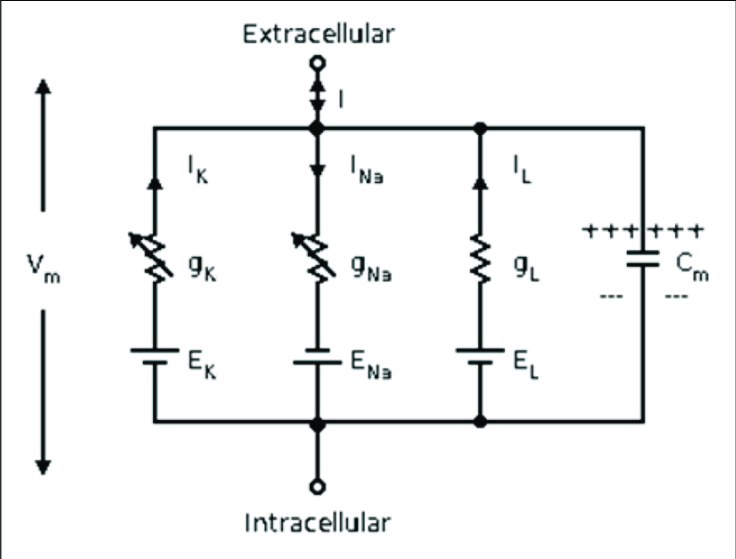

### Question 3.4 [3]
Recall the equivalent RC circuit corresponding to the Hodgkin Huxley model (see schematic above). Based on your answer to 3.3, with $\bar{g}_{Na}$ and $\bar{g}_{K} = 0$, describe the flow of current through this circuit for three time periods: 0 ms < t < 50 ms, 50 ms < t < 150 ms, and 150 ms < t < 200 ms. Be sure to (1) specify the direction and magnitude* of current flow in each branch of the circuit for these time periods and (2) link your answers with the voltage plot you generated in 3.3. You may assume that the injected current was generated by transiently attaching a battery with voltage $E_{battery}$ > $E_l$. 

*By magnitude we don't mean that you need to provide any numbers: a qualitive account of current is sufficient. 

><font color="firebrick">Answer here

## Question 4: HH Conceptual [5]



### Question 4.1 [2.5]
What is the main distinction between Hodgkin-Huxley type models and integrate-and-fire type models? What are the advantages of each type?

><font color="firebrick">Answer here

### Question 4.2 [2.5]

Let's say we wanted to add another channel-type $X$ to our H-H model to describe a more complex type of neural activity. How would you modify the H-H system of equations to accomodate this? Please answer in 3 sentences or less.

><font color="firebrick">Answer here

## Question 5: Cable Properties of Axons [10]

Now consider an axon as a cable. The figures below show the response of the neuron to current injection with an electrode at the location 0mm. Note: βA in the figure below should instead be pA. **Answers should these questions should be concise & no more than 3-5 sentences**

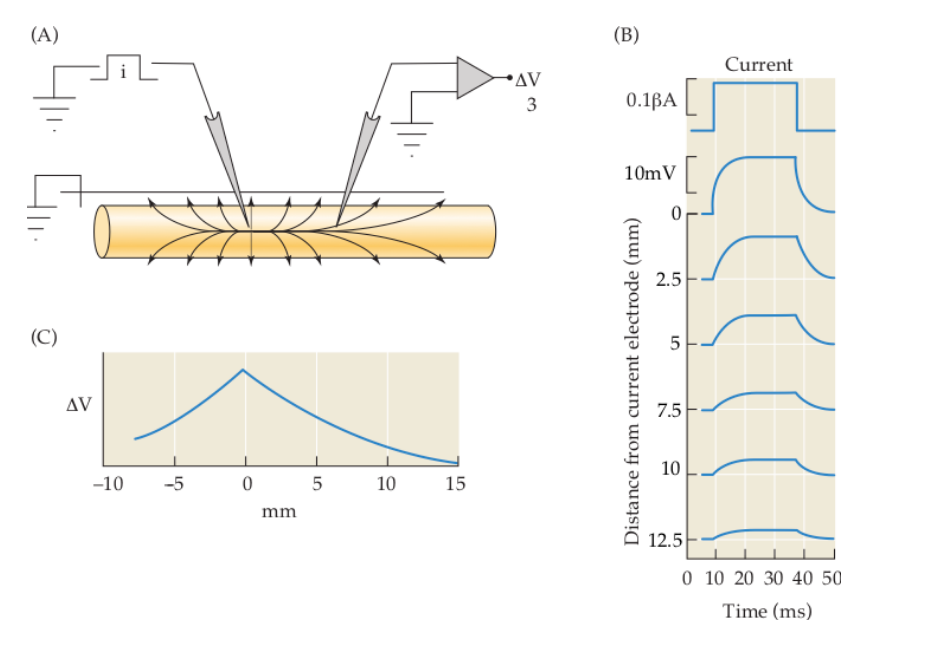

### Question 5.1 [2]
Why is the change in voltage larger at 0mm relative to +15mm? Your answer should be supported by a mathematical equation.


><font color="firebrick">Answer here

### Question 5.2 [1.5]
Why does it take 20ms for the membrane potential to rise to +10mV following current injection at 0mm? 

><font color="firebrick">Answer here

### Question 5.3 [1.5]
Why does the membrane potential rise slower at 10mm?

><font color="firebrick">Answer here

### Question 5.4 [2]
Why is the voltage change at +5mm and -5mm similar?

><font color="firebrick">Answer here

### Question 5.5 [3]
Using the equation from 5.1, what is the value of lambda, the length constant, for this axon? Show your work.

><font color="firebrick">Answer here

# Part II- Manipulation of Neural Activity

## Question 6: Cooling [5]

You conduct an experiment using temperature to understand the vocalization pathways in the Egyptian fruit bat. The Egyptian fruit bat’s vocalizations can be broken down into a hierarchical structure: they repeat vocal motifs, of length 0.5-1s. These motifs are composed of syllables. Each syllable can have complex tonal structure. The literature suggests that neural activity in areas A, B, and Z are correlated with vocalizations. You know that area Z projects to area A and area A projects to area B. The motor neurons responsible for vocalization are a few synapses downstream of neurons in area B. You hope to establish the causal relationship between areas A and B and these vocalizations. You have developed an experimental method where you can use a Peltier device to cool area Z, A, or B.


### Question 6.1 [2]
You cool area A in several freely behaving bats. You observe that motif and syllable onsets are slowed, but subsyllabic structure exhibits no dilation. Breifly, what do you conclude?

><font color="firebrick">Answer here

### Question 6.2 [3]

You now cool area B and observe no effects on song structure at any level. In addition, high frequency spontaneous bursts of action potentials (APs) in area B (which are known to receive projections from neurons in area A) are not affected by cooling area B. Finally, tonic firing of APs in area B is slowed with cooling in area B. What do you conclude the relationship of area B, burst APs, and tonic APs to song timing?

><font color="firebrick">Answer here

## Question 7: Optogenetics [5]

Imagine you are a systems neuroscientist and want to activate cells via channelrhodopsin in different neuronal populations. How would you achieve specificity in each of these contexts? Be specific and concise in terms of brain sites and molecular tools used. 

### Question 7.1 [2.5]

You want to activate LGN neurons projecting to V1.
><font color="firebrick">Answer here


><font color="firebrick"> 

### Question 7.2 [2.5]

You want to activate in paravalbumin (PV+) interneurons in the PFC.

><font color="firebrick">Answer here
